<a href="https://colab.research.google.com/github/Lucas-Petrus/DS-Unit-2-Applied-Modeling/blob/master/ThursdayLucasPetrusNBAdataLS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

The score I would get for just guessing would be 50.00% accuracy

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Lucas-Petrus/DS-Unit-2-Applied-Modeling/master/data/nba.games.stats.csv%20-%20Sheet1.csv')

In [ ]:
df.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29


In [ ]:
df = df.drop(columns={'Unnamed: 0'}, axis=1)

In [ ]:
df = df.drop(columns={'TeamPoints','OpponentPoints','Game','FieldGoals',
                      'FieldGoals.','X3PointShots','X3PointShots.','FreeThrows',
                      'Opp.FieldGoals','Opp.FieldGoals.','Opp.3PointShots',
                      'Opp.3PointShots.','Opp.FreeThrows'}, axis=1,)

In [ ]:
df.head()

,Team,Date,Home,Opponent,WINorLOSS,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,L,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,W,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,L,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,L,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,W,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [ ]:
df.rename(columns={'WINorLOSS':'WINNER'}, inplace=True)

In [ ]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,L,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,W,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,L,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,L,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,W,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [ ]:
df['WINNER'] = df['WINNER'] == 'W'

In [ ]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [ ]:
df['Home'] = df['Home'] =='Home'

In [ ]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [ ]:
df.isnull().sum()

Team                        0
Date                        0
Home                        0
Opponent                    0
WINNER                      0
FieldGoalsAttempted         0
X3PointShotsAttempted       0
FreeThrowsAttempted         0
FreeThrows.                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoalsAttempted     0
Opp.3PointShotsAttempted    0
Opp.FreeThrowsAttempted     0
Opp.FreeThrows.             0
Opp.OffRebounds             0
Opp.TotalRebounds           0
Opp.Assists                 0
Opp.Steals                  0
Opp.Blocks                  0
Opp.Turnovers               0
Opp.TotalFouls              0
dtype: int64

In [ ]:
df.describe()

,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,84.902439,25.623679,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537,84.902439,25.623679,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,7.130043,7.102501,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611,7.130043,7.102501,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,60.000000,4.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000,60.000000,4.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,80.000000,21.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,80.000000,21.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,85.000000,25.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000,85.000000,25.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,89.000000,30.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000,89.000000,30.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,129.000000,61.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000,129.000000,61.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      9840 non-null   object 
 1   Date                      9840 non-null   object 
 2   Home                      9840 non-null   bool   
 3   Opponent                  9840 non-null   object 
 4   WINNER                    9840 non-null   bool   
 5   FieldGoalsAttempted       9840 non-null   int64  
 6   X3PointShotsAttempted     9840 non-null   int64  
 7   FreeThrowsAttempted       9840 non-null   int64  
 8   FreeThrows.               9840 non-null   float64
 9   OffRebounds               9840 non-null   int64  
 10  TotalRebounds             9840 non-null   int64  
 11  Assists                   9840 non-null   int64  
 12  Steals                    9840 non-null   int64  
 13  Blocks                    9840 non-null   int64  
 14  Turnover

In [ ]:
df['Opponent'].unique()

array(['TOR', 'IND', 'SAS', 'CHO', 'NYK', 'UTA', 'MIA', 'CLE', 'LAL',
       'DET', 'WAS', 'NOP', 'BOS', 'BRK', 'DEN', 'PHI', 'ORL', 'CHI',
       'HOU', 'DAL', 'LAC', 'MIL', 'POR', 'MEM', 'OKC', 'MIN', 'GSW',
       'SAC', 'PHO', 'ATL'], dtype=object)

In [ ]:
east = ['TOR','IND','CHO','NYK','MIA','CLE','DET',
        'WAS','BOS','BRK','PHI','ORL','CHI','MIL','ATL']

df['EastOpponent'] = df['Opponent'].isin(east)
                                         
                                         

In [ ]:
west = ['SAS','UTA','LAL','NOP','DEN','HOU','DAL',
        'LAC','POR','MEM','OKC','MIN','GSW','SAC','PHO']

df['WestOpponent'] = df['Opponent'].isin(west)

In [ ]:
df['DefRebound'] = df['TotalRebounds'] - df['OffRebounds']

In [ ]:
df['Opp.DefRebound'] = df['Opp.TotalRebounds'] - df['Opp.OffRebounds']

In [ ]:
df['X2PointShotAttempted'] = df['FieldGoalsAttempted'] - df['X3PointShotsAttempted']

In [ ]:
df['Opp.2PointShotAttempted'] = df['Opp.FieldGoalsAttempted'] - df['Opp.3PointShotsAttempted']

In [ ]:
df['HighFreeThrow%'] = df['FreeThrows.'] > .800

In [ ]:
df['Opp.HighFreeThrow%'] = df['Opp.FreeThrows.'] >.800

In [ ]:
df['HighFreeThrow%'].value_counts()

False    6310
True     3530
Name: HighFreeThrow%, dtype: int64

In [ ]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22,True,False,32,32,58,64,False,True
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26,True,False,34,33,49,49,False,True
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15,False,True,27,39,67,52,False,False
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30,True,False,31,40,60,76,False,False
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29,True,False,29,31,59,63,False,False


In [ ]:
df['TotalRebounds'].value_counts()

43    655
42    635
44    607
45    574
40    570
41    559
46    543
47    535
39    454
49    435
48    424
38    417
37    388
50    336
36    316
51    305
35    278
52    244
34    210
53    201
33    189
54    151
32    130
55    121
31     82
57     77
56     76
58     52
30     51
59     37
29     34
60     27
28     20
61     19
62     19
27     17
26     11
63     10
25      7
64      5
66      4
65      3
67      3
22      2
24      2
81      1
72      1
20      1
68      1
23      1
Name: TotalRebounds, dtype: int64

In [ ]:
df['HighRebounds'] = df['TotalRebounds'] >= 60

In [ ]:
df['OppHighRebounds'] = df['Opp.TotalRebounds'] >=60

In [ ]:
df['AssistsTurnoverRatio'] = df['Assists'] / df['Turnovers']

In [ ]:
df['Opp.AssistsTurnoverRatio'] = df['Opp.Assists'] / df['Opp.Turnovers']

In [ ]:
df['TotalFouls'].value_counts()

19    964
20    952
18    846
21    836
22    782
17    745
23    685
16    645
24    547
15    476
25    444
14    363
26    314
13    225
27    218
12    161
28    149
29    129
11     91
30     71
31     45
10     40
32     30
33     18
9      16
34     15
35     10
8       9
36      4
37      4
7       2
41      1
42      1
38      1
39      1
Name: TotalFouls, dtype: int64

In [ ]:
df['HighFoul%'] = df['TotalFouls'] >= 30

In [ ]:
df['Opp.HighFoul%'] = df['Opp.TotalFouls'] >= 30

In [ ]:
df['GameChangers'] = df['Steals'] + df['Blocks']

In [ ]:
df['Opp.GameChangers'] = df['Opp.Steals'] + df['Opp.Blocks']

In [ ]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%,HighRebounds,OppHighRebounds,AssistsTurnoverRatio,Opp.AssistsTurnoverRatio,HighFoul%,Opp.HighFoul%,GameChangers,Opp.GameChangers
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22,True,False,32,32,58,64,False,True,False,False,1.529412,2.888889,False,False,14,22
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26,True,False,34,33,49,49,False,True,False,False,2.166667,1.388889,False,False,16,10
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15,False,True,27,39,67,52,False,False,False,False,2.000000,1.315789,False,False,19,16
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30,True,False,31,40,60,76,False,False,False,False,1.473684,1.631579,True,True,11,13
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29,True,False,29,31,59,63,False,False,False,False,2.250000,1.733333,False,False,15,8


In [ ]:
df['WINNER'].value_counts(normalize='True')

True     0.5
False    0.5
Name: WINNER, dtype: float64

In [ ]:
target = df['WINNER']

X = df.drop('WINNER', axis=1)

In [ ]:
train = X[X['Date'] <= '2016-06-30']

In [ ]:
train.shape

(4920, 42)

In [ ]:
val = X[X['Date'] > '2016-06-30']
val = val[val['Date'] <= '2017-06-30']

In [ ]:
val.shape

(2460, 42)

In [ ]:
test = X[X['Date'] > '2017-06-30']

In [ ]:
test.shape

(2460, 42)

In [ ]:
y = target
X_train = train
y_train = y[y.index.isin(X_train.index)]
X_val = val
y_val = y[y.index.isin(X_val.index)]
X_test = test
y_test = y[y.index.isin(X_test.index)]

In [ ]:
  !pip install category_encoders==2

In [ ]:
import pandas as pd
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
###I dont feel like I did this right, this was my attempt to do a quick, easy train

pipeline = make_pipeline(
  ce.OneHotEncoder(),
  SimpleImputer(),
  StandardScaler(),
  RandomForestClassifier(
      n_estimators= 20,
      n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('training accuracy:', pipeline.score(X_train, y_train))
print('validation accuracy:', pipeline.score(X_val, y_val))


training accuracy: 0.9991869918699187
validation accuracy: 0.8134146341463414


In [ ]:
pipeline = make_pipeline(
    #go back to ordinal
  ce.OneHotEncoder(drop_invariant=True),
  SimpleImputer(strategy='median'),
  StandardScaler(with_mean=False),
  RandomForestClassifier(
      #criterion = 'entropy',
      #max_depth=19,
      #min_samples_split=7,
      #max_features=9,
      n_estimators= 20,
      n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__criterion': ('gini','entropy'),
    #'randomforestclassifier__max_depth' : (25,26,28,29),
    #'randomforestclassifier__max_features': (9,10,11,12),
    #'randomforestclassifier__min_samples_split': (6,10,12,14,15)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=10,
    scoring='accuracy',
    verbose = 20,
    return_train_score=True,
    n_jobs=-1,
)

search.fit(X_train, y_train)
print('Cross-validation Best Score', search.best_score_)
print('Best Estimator', search.best_params_)
print('Best Model', search.best_estimator_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

Cross-validation Best Score 0.8081300813008131
Best Estimator {'randomforestclassifier__criterion': 'entropy'}
Best Model Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Team', 'Date', 'Opponent'],
                               drop_invariant=True, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 St...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                              

In [ ]:
print('training accuracy:', search.score(X_train, y_train))
print('validation accuracy:', search.score(X_val, y_val))
print('testing accuracy:', search.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.7979674796747968
testing accuracy: 0.8


In [ ]:
from xgboost import XGBClassifier

gb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100,
                  random_state=42,
                  n_jobs=-1)
)

gb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Team', 'Date', 'Opponent'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Team',
                                          'data_type': dtype('O'),
                                          'mapping': ATL     1
BOS     2
BRK     3
CHO     4
CHI     5
CLE     6
DAL     7
DEN     8
DET     9
GSW    10
HOU    11
IND    12
LAC    13
LAL    14
MEM    15
MIA    16
MIL    17
MIN    18
NOP    19
NYK    20
OKC    21
ORL    22
PHI    23
PHO    24
POR    25
SAC    26
SAS    27
TOR    28
UTA...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,


In [ ]:
 print('Training Accuracy:', gb.score(X_train, y_train))
print('Validation Accuracy:', gb.score(X_val, y_val))

Training Accuracy: 0.9115853658536586
Validation Accuracy: 0.8573170731707317


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    GradientBoostingClassifier(random_state=42)
)


pipeline.fit(X_train, y_train);

In [ ]:
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

In [ ]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(pipeline,
                            X_val,
                            y_val,
                            random_state=42,
                            n_jobs=-1)

In [ ]:
pi.keys()

In [ ]:
p_importance = pd.DataFrame({'feature' : X_val.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=False).head(10)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

!pip install pdpbox
!pip install shap

In [ ]:
X_val.head()

,Team,Date,Home,Opponent,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%,HighRebounds,OppHighRebounds,AssistsTurnoverRatio,Opp.AssistsTurnoverRatio,HighFoul%,Opp.HighFoul%,GameChangers,Opp.GameChangers
4920,ATL,2016-10-27,True,WAS,88,26,18,0.778,14,52,28,13,7,21,19,94,20,18,0.722,12,40,25,14,4,19,20,True,False,38,28,62,74,False,False,False,False,1.333333,1.315789,False,False,20,18
4921,ATL,2016-10-29,False,PHI,85,20,23,0.652,6,47,31,11,7,12,14,80,18,15,0.733,4,39,16,9,5,20,20,True,False,41,35,65,62,False,False,False,False,2.583333,0.800000,False,False,18,14
4922,ATL,2016-10-31,True,SAC,79,30,47,0.617,17,43,24,11,6,13,20,75,23,19,0.684,6,38,26,10,6,19,34,False,True,26,32,49,52,False,False,False,False,1.846154,1.368421,False,True,17,16
4923,ATL,2016-11-02,True,LAL,85,32,29,0.793,10,37,30,10,1,18,19,90,22,20,0.900,11,42,24,11,9,15,25,False,True,27,31,53,68,False,True,False,False,1.666667,1.600000,False,False,11,20
4924,ATL,2016-11-04,False,WAS,83,25,36,0.639,10,47,22,12,3,18,24,80,20,35,0.800,11,46,13,7,3,19,23,True,False,37,35,58,60,False,False,False,False,1.222222,0.684211,False,False,15,10


In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Blocks'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

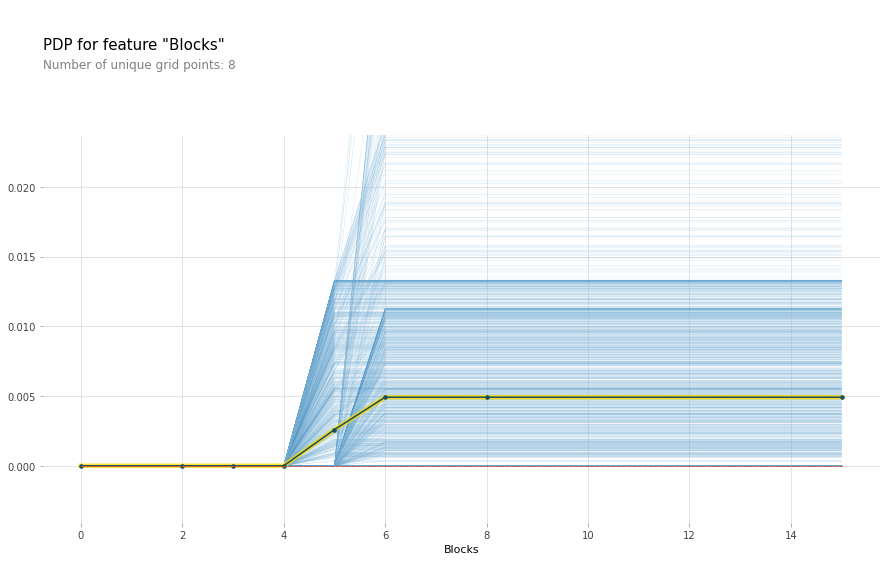

In [ ]:
#this shows that as blocks go up, your proability of winning a game begins to go up

pdp_plot(isolated, feature_name=feature, plot_lines=True);

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Turnovers'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

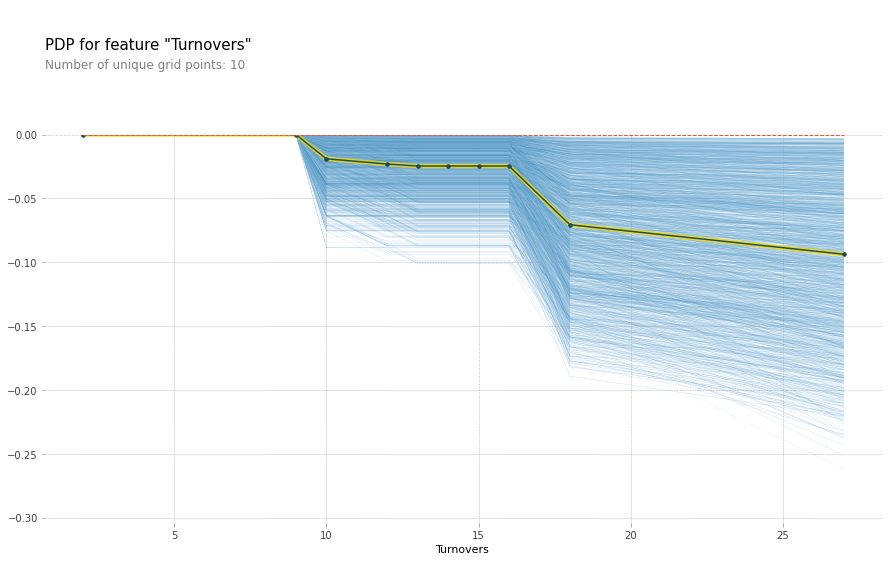

In [ ]:
#this shows as your turnovers become greater, you probability of winning a game decreases significantly 
pdp_plot(isolated, feature_name=feature, plot_lines=True);

In [ ]:
X_test.head()

,Team,Date,Home,Opponent,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%,HighRebounds,OppHighRebounds,AssistsTurnoverRatio,Opp.AssistsTurnoverRatio,HighFoul%,Opp.HighFoul%,GameChangers,Opp.GameChangers
7380,ATL,2017-10-18,False,DAL,94,18,15,0.800,14,50,20,11,6,13,18,86,45,21,0.857,9,41,27,5,4,15,19,False,True,36,32,76,41,False,True,False,False,1.538462,1.800000,False,False,17,9
7381,ATL,2017-10-20,False,CHO,95,30,14,0.857,6,38,19,11,4,13,29,86,36,30,0.800,12,57,17,5,4,21,18,True,False,32,45,65,50,True,False,False,False,1.461538,0.809524,False,False,15,9
7382,ATL,2017-10-22,False,BRK,94,27,36,0.917,16,48,21,6,2,16,25,87,27,34,0.676,13,51,27,12,8,18,27,True,False,32,38,67,60,True,False,False,False,1.312500,1.500000,False,False,8,20
7383,ATL,2017-10-23,False,MIA,76,17,18,0.778,6,41,14,9,1,20,17,85,37,18,0.667,10,41,21,12,6,19,19,True,False,35,31,59,48,False,False,False,False,0.700000,1.105263,False,False,10,18
7384,ATL,2017-10-26,False,CHI,81,28,13,0.846,7,40,22,10,5,10,23,86,32,29,0.759,18,62,20,5,4,13,15,True,False,33,44,53,54,True,False,False,True,2.200000,1.538462,False,False,15,9


In [ ]:
features = ['Assists', 'Steals', 'Blocks', 'Turnovers']

X_train = train[features]
y_train 
X_test = test[features]
y_test 

7380     True
7381    False
7382    False
7383    False
7384    False
        ...  
9835    False
9836    False
9837    False
9838     True
9839    False
Name: WINNER, Length: 2460, dtype: bool

In [ ]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=6, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of  10 | elapsed:    5.9s remaining:   13.8s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    6.2s remaining:    6.2s
[Parallel(n_jobs=6)]: Done   7 out of  10 | elapsed:    8.9s remaining:    3.8s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    9.3s finished


In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.020584494295802447, 'n_estimators': 307}
Cross-validation MAE 0.4331990911624236


In [ ]:
row = X_test.iloc[[0]]
row

,Assists,Steals,Blocks,Turnovers
7380,20,11,6,13


In [ ]:
y_test.iloc[[0]]

7380    True
Name: WINNER, dtype: bool

In [ ]:
model.predict(row)

array([0.48645692])

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)